Peserta FGA Machine Learning
- Nama : Fernanda

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir dataset
!unzip '/content/drive/MyDrive/Dataset/Dogs & Cats Images.zip' -d '/content/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: /content/dataset/dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: /content/dataset/dog vs cat/dataset/t

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
path_train = '/content/dataset/dataset/training_set'
path_test = '/content/dataset/dataset/test_set'

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(path_train,
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary')

valid_data = datagen.flow_from_directory(path_test,
                                    target_size=(150,150),
                                    batch_size=32,
                                    class_mode='binary')

class_names = (train_data.class_indices)
print(class_names)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [6]:
for image_batch, label_batch in train_data:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 150, 150, 3)
(32,)


### Model

In [13]:
num_class=len(class_names)
model = Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(150,150,3)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [16]:
start = time.perf_counter()
early_stopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                         mode ="min", patience=5)
history = model.fit(train_data, 
                    epochs=50, 
                    batch_size=32,
                    validation_data=valid_data,
                    callbacks=[early_stopping])

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)  

Epoch 1/50
250/250 [==============================] - 198s 790ms/step - loss: 0.6820 - accuracy: 0.5651 - val_loss: 0.6400 - val_accuracy: 0.6280
Epoch 2/50
250/250 [==============================] - 200s 799ms/step - loss: 0.6111 - accuracy: 0.6635 - val_loss: 0.6033 - val_accuracy: 0.6745
Epoch 3/50
250/250 [==============================] - 198s 793ms/step - loss: 0.5246 - accuracy: 0.7409 - val_loss: 0.6043 - val_accuracy: 0.6710
Epoch 4/50
250/250 [==============================] - 199s 794ms/step - loss: 0.4585 - accuracy: 0.7868 - val_loss: 0.4822 - val_accuracy: 0.7660
Epoch 5/50
250/250 [==============================] - 199s 795ms/step - loss: 0.3951 - accuracy: 0.8190 - val_loss: 0.4380 - val_accuracy: 0.7990
Epoch 6/50
250/250 [==============================] - 198s 794ms/step - loss: 0.3246 - accuracy: 0.8545 - val_loss: 0.4147 - val_accuracy: 0.8085
Epoch 7/50
250/250 [==============================] - 199s 797ms/step - loss: 0.2558 - accuracy: 0.8917 - val_loss: 0.4164 -

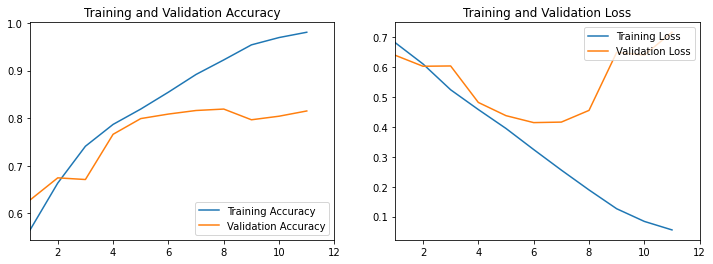

In [17]:
# Plotting accuracy and val_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_acc)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Loss')
plt.show()

### Convert to tf_lite

In [19]:
# convert model
#model.save("model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("model.tflite",'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpr9aboila/assets


INFO:tensorflow:Assets written to: /tmp/tmpr9aboila/assets


6819092